In [4]:
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Plot styling
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [5]:
dataset=pd.read_csv('Mall_Customers.csv')

In [6]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
len(dataset) # of rows

200

In [8]:
dataset.describe().transpose() #descriptive statistics of the dataset

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


E:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


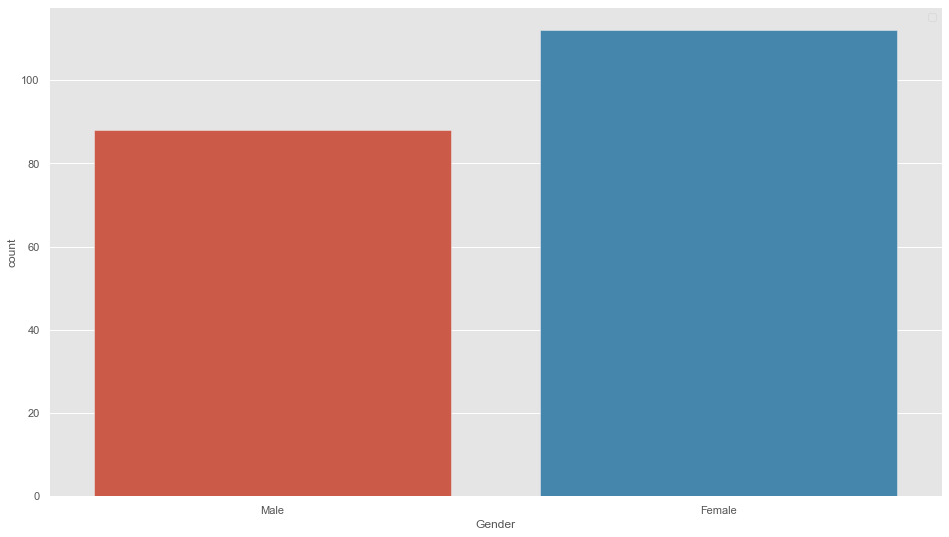

In [10]:
sns.countplot(dataset['Gender'])
plt.legend()
plt.show()

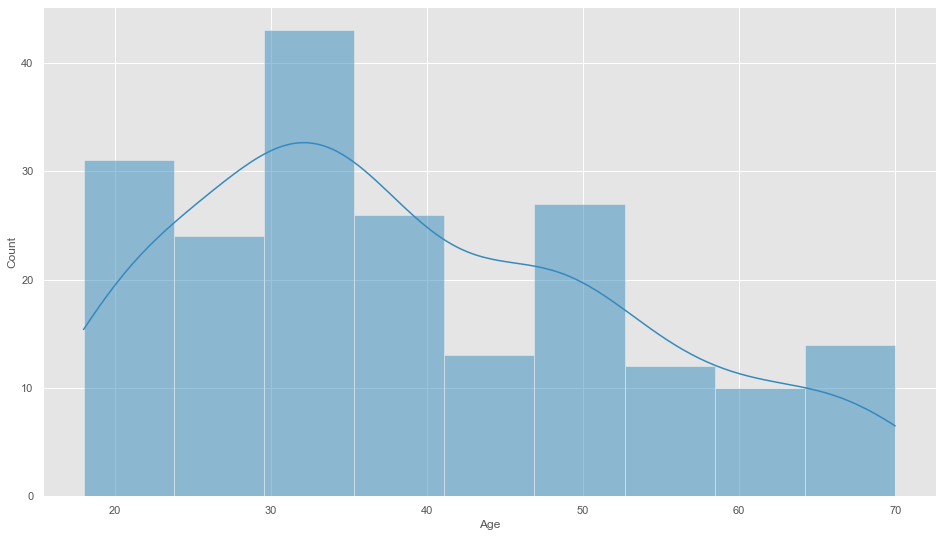

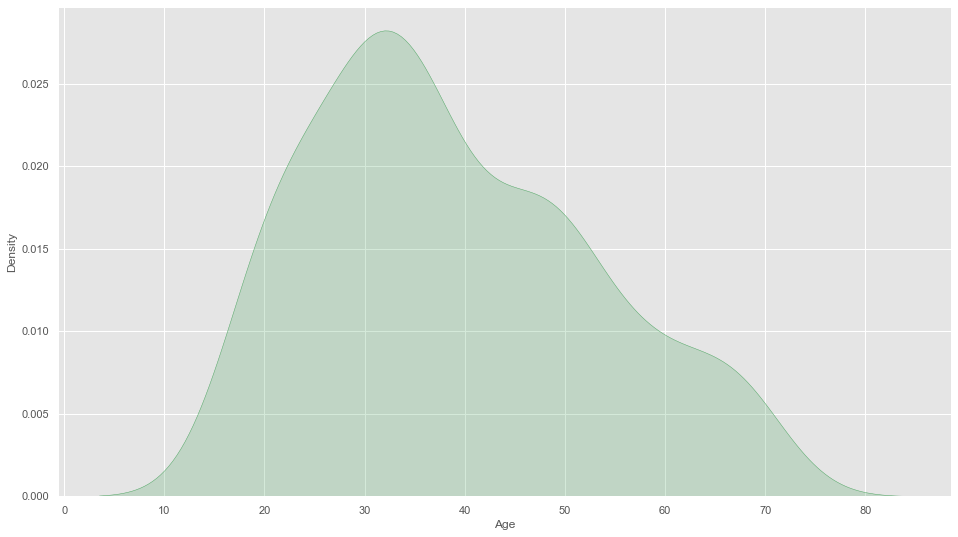

In [11]:
plt.subplot()
sns.histplot(dataset['Age'], kde=True)
plt.show()
plt.subplot()
sns.kdeplot(dataset['Age'],shade=True, color='g')  
plt.show()

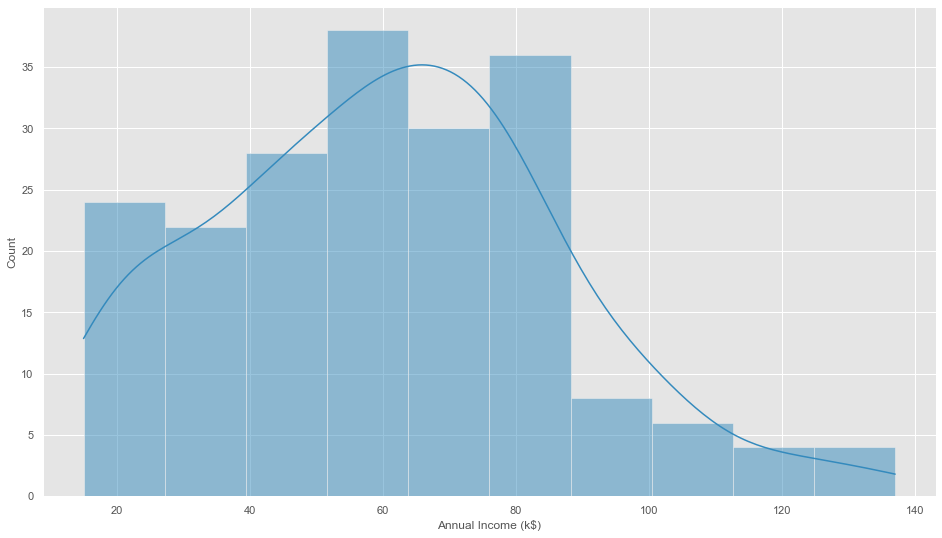

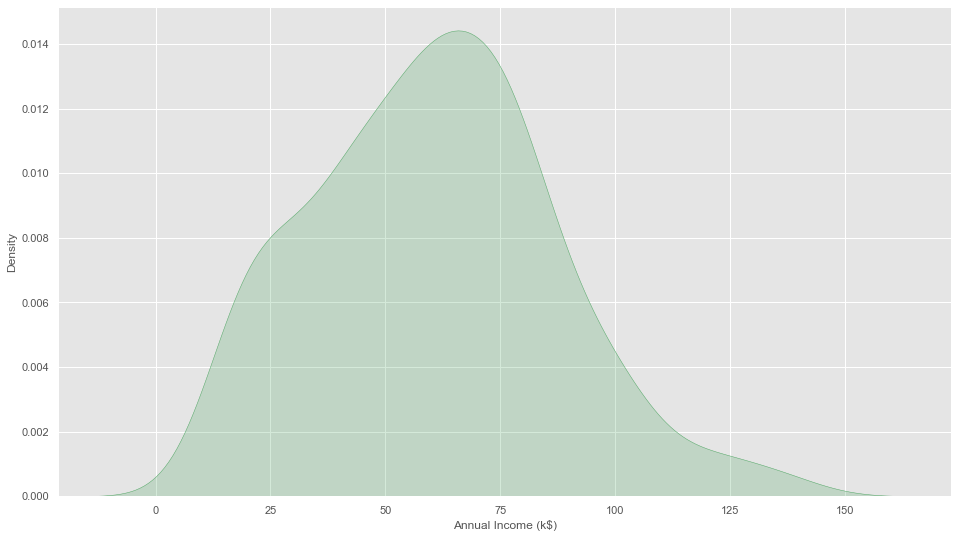

In [12]:
plt.subplot()
sns.histplot(dataset['Annual Income (k$)'], kde=True)
plt.show()
plt.subplot()
sns.kdeplot(dataset['Annual Income (k$)'],shade=True, color='g')  
plt.show()

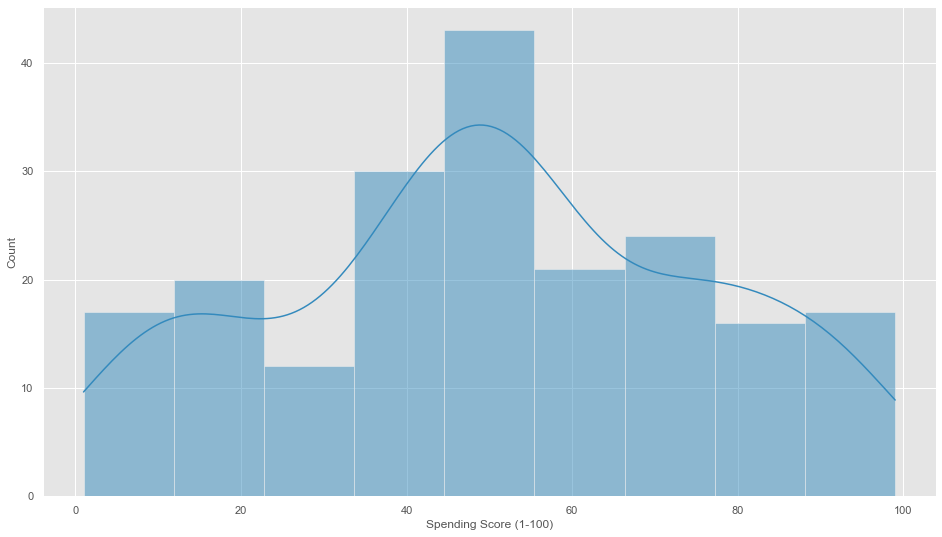

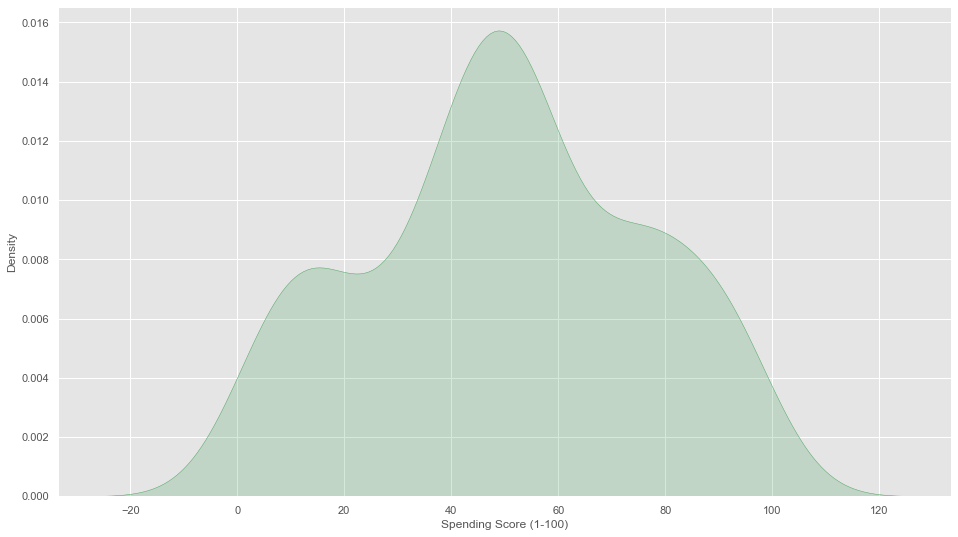

In [13]:
plt.subplot()
sns.histplot(dataset['Spending Score (1-100)'], kde=True)
plt.show()
plt.subplot()
sns.kdeplot(dataset['Spending Score (1-100)'],shade=True, color='g')  
plt.show()

In [15]:
x = dataset.iloc[:, [3, 4]].values 
gender = {'Male': 1,'Female': 2}
dataset.Gender = [gender[item] for item in dataset.Gender]
dataset.drop('CustomerID', axis=1, inplace=True)

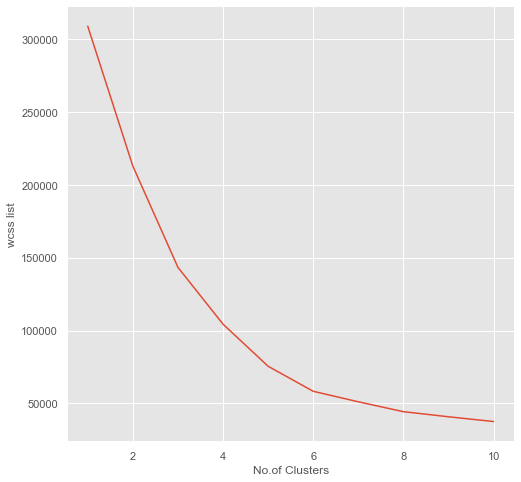

In [16]:
# Elbow method to finding the No of clusters for the dataset.
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(8,8))
k_values = list(range(1,11))
wcss_list = []

for i in k_values:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=100)
    kmeans.fit(dataset)
    wcss_list.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss_list)
plt.xlabel('No.of Clusters')
plt.ylabel('wcss list')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=100)
y_pred = kmeans.fit_predict(dataset)

In [18]:
len(y_pred)

200

In [19]:
dataset['Predicted']  = y_pred

In [21]:
dataset

,Gender,Age,Annual Income (k$),Spending Score (1-100),Predicted
0,1,19,15,39,1
1,1,21,15,81,4
2,2,20,16,6,1
3,2,23,16,77,4
4,2,31,17,40,1
...,...,...,...,...,...
195,2,35,120,79,3
196,2,45,126,28,2
197,1,32,126,74,3
198,1,32,137,18,2


In [22]:
dataset[y_pred == 0]

,Gender,Age,Annual Income (k$),Spending Score (1-100),Predicted
46,2,50,40,55,0
47,2,27,40,47,0
48,2,29,40,42,0
49,2,31,40,42,0
50,2,49,42,52,0
...,...,...,...,...,...
120,1,27,67,56,0
121,2,38,67,40,0
122,2,40,69,58,0
126,1,43,71,35,0


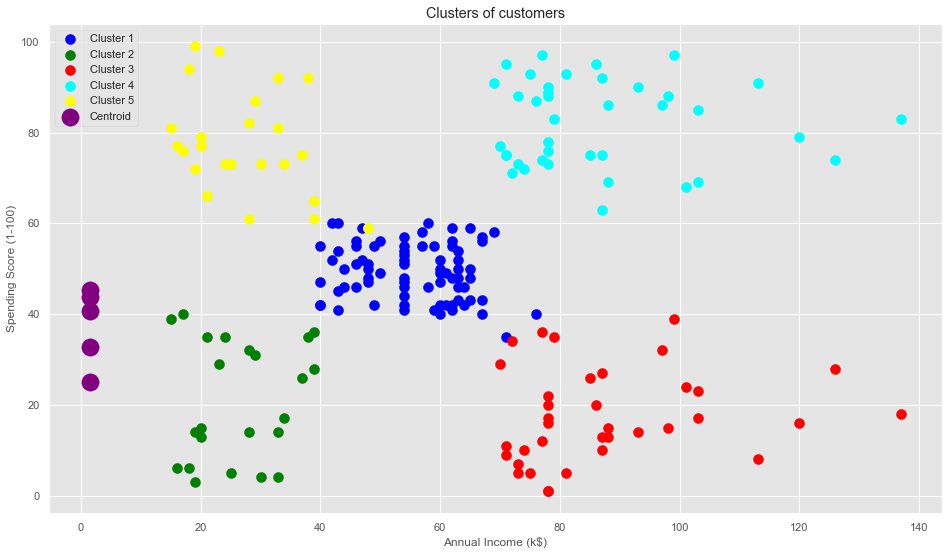

In [25]:
plt.scatter(dataset[y_pred == 0]['Annual Income (k$)'], dataset[y_pred == 0]['Spending Score (1-100)'], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(dataset[y_pred == 1]['Annual Income (k$)'], dataset[y_pred == 1]['Spending Score (1-100)'], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(dataset[y_pred== 2]['Annual Income (k$)'], dataset[y_pred == 2]['Spending Score (1-100)'], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(dataset[y_pred == 3]['Annual Income (k$)'], dataset[y_pred == 3]['Spending Score (1-100)'], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(dataset[y_pred == 4]['Annual Income (k$)'], dataset[y_pred == 4]['Spending Score (1-100)'], s = 100, c = 'yellow', label = 'Cluster 5') #for fourth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'purple', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()